# Determine multi-agent plan conflict

In [14]:
import sys
sys.path.append('../')

sys.path.append('../../')

from panav.PBS.conflict import MA_plan_conflict

from panav.env import NavigationEnv, Box2DRegion, PolygonRegion, box_2d_center, line_seg_to_obstacle
from panav.viz import draw_env
from panav.SAMP import Tube_Planning
from panav.util import unique_tx, interpolate_positions


from panav.viz import animation
from IPython.display import HTML, display

import shapely
import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# go_agent = 0
# yield_agent = 1

d = 2
K = 10
t0 = 0
vmax = 1.0

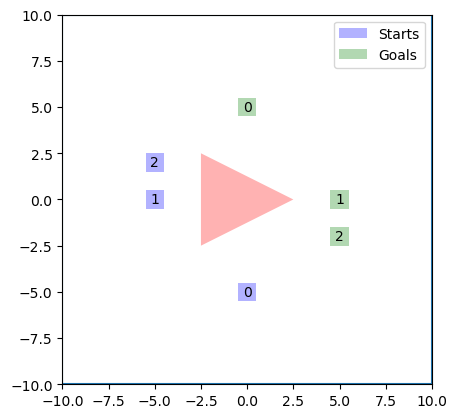

In [15]:

start_locs = np.array([[0,-5],[-5,0],[-5,2]])*1.0
goal_locs = np.array([[0,5],[5,0],[5,-2]])*1.0


start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

starts = [box_2d_center(s,start_box_side) for s in start_locs]

goals = [box_2d_center(g,goal_box_side) for g in goal_locs]

limits = [(-10.0,10.0),(-10.0,10.0)]

O1 = PolygonRegion([(-2.5,2.5),(-2.5,-2.5),(2.5,0)])

env = NavigationEnv(limits,[O1],starts,goals)

draw_env(env)

# Planning without conflict resolution

In [17]:
agents = set(np.arange(len(start_locs)))

plan = []

bloating_r = 0.5
d = 2
K = 10
t0 = 0
vmax = 1.0

for agent in agents:
    start = env.starts[agent]
    goal = env.goals[agent]

    t, xs = Tube_Planning(env,start,goal,vmax,bloating_r,\
                                 [],\
                                d,K,t0)

    t,xs = unique_tx(t,xs)
    plan.append((t,xs))

In [18]:
print('flowtime:', np.sum([t[-1] for t,x in plan]))

flowtime: 40.909027819793124


/Users/tianpengzhang/Dropbox (Harvard University)/Tianpeng's research/Tianpeng & Lina/Multiagent Motion Planning/PA-Nav/notebooks/../panav/PBS/conflict.py:68: RuntimeWarning: invalid value encountered in double_scalars
  t_star = -u.dot(v)/v.dot(v)


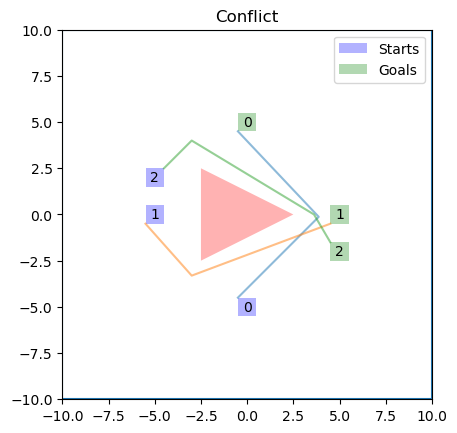

In [20]:
draw_env(env,[x for t,x in plan])

plt.title('Conflict' if MA_plan_conflict(plan,bloating_r)
 else 'No Conflict')


plt.show()


# Planning with fixed-priority conflict resolution

In [23]:
plan = []
for agent in agents:
    start = env.starts[agent]
    goal = env.goals[agent]

    t, xs = Tube_Planning(env,start,goal,vmax,bloating_r,\
                                 plan,\
                                d,K,t0)
    t,xs = unique_tx(t,xs)
    plan.append((t,xs))

In [24]:
print('flowtime:', np.sum([t[-1] for t,xs in plan]))

flowtime: 44.42365907983837


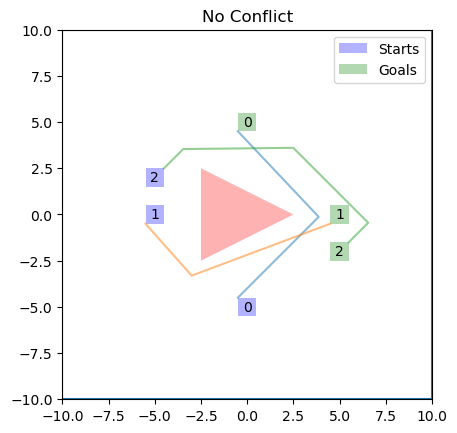

In [26]:
draw_env(env,[x for t,x in plan])

plt.title('Conflict' if MA_plan_conflict(plan,bloating_r)
 else 'No Conflict')


plt.show()